In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
data = pd.read_csv('energydata_realenergydata.csv')

In [3]:
df = pd.read_csv('energydata_realenergydata.csv')
df.head()

,S/N,meter_id,timestamp1,timestamp2,current,voltage,frequency,power_factor,energy,real_power,reactive_power,apparent_power
0,9384,IBD240,2022-10-14 00:27:17+01,2022-10-14 00:27:45.710817+01,3.14,233.14,50.12,0.96,99.2208,703.22,205.14,732.53
1,9385,IBD240,2022-10-14 00:28:13+01,2022-10-14 00:28:41.420716+01,3.17,233.24,50.14,0.96,99.2318,708.90,206.77,738.44
2,9386,IBD240,2022-10-14 00:29:09+01,2022-10-14 00:29:37.141494+01,3.22,233.18,50.13,0.96,99.2428,721.70,210.49,751.77
3,9387,IBD240,2022-10-14 00:31:00+01,2022-10-14 00:31:28.594932+01,3.26,233.50,50.17,0.96,99.2651,731.21,213.28,761.68
4,9388,IBD240,2022-10-14 00:31:56+01,2022-10-14 00:32:24.389059+01,3.16,233.52,50.16,0.96,99.2764,707.96,206.49,737.46


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048191 entries, 0 to 1048190
Data columns (total 12 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   S/N             1048191 non-null  int64  
 1   meter_id        1048191 non-null  object 
 2   timestamp1      1048191 non-null  object 
 3   timestamp2      1048191 non-null  object 
 4   current         1048191 non-null  float64
 5   voltage         1048191 non-null  float64
 6   frequency       1048191 non-null  float64
 7   power_factor    1048191 non-null  float64
 8   energy          1048191 non-null  float64
 9   real_power      1048191 non-null  float64
 10  reactive_power  1048191 non-null  float64
 11  apparent_power  1048191 non-null  float64
dtypes: float64(8), int64(1), object(3)
memory usage: 96.0+ MB


In [5]:
df['timestamp1'] = pd.to_datetime(df['timestamp1'])

In [6]:
df = df.rename(columns={'timestamp1':'timestamp'})

In [7]:
df.describe(include='all',datetime_is_numeric=True)

,S/N,meter_id,timestamp,timestamp2,current,voltage,frequency,power_factor,energy,real_power,reactive_power,apparent_power
count,1.048191e+06,1048191,1048191,1048191,1.048191e+06,1.048191e+06,1.048191e+06,1.048191e+06,1.048191e+06,1.048191e+06,1.048191e+06,1.048191e+06
unique,NaN,45,NaN,1048191,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,IKD201,NaN,2022-10-14 00:27:45.710817+01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,124791,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,6.781169e+05,NaN,2022-12-20 23:36:24.929899776+01:00,NaN,1.836603e+00,1.933350e+02,5.139740e+01,6.466310e-01,8.736218e+01,2.793754e+02,1.894367e+02,3.554700e+02
min,9.384000e+03,NaN,2004-01-01 00:00:08+01:00,NaN,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.459555e+05,NaN,2022-11-18 01:54:40.500000+01:00,NaN,4.000000e-02,1.882000e+02,5.008000e+01,5.200000e-01,9.079500e+00,3.840000e+00,5.600000e+00,7.530000e+00
50%,6.717380e+05,NaN,2022-12-23 11:45:39+01:00,NaN,9.100000e-01,2.051800e+02,5.018000e+01,6.900000e-01,5.264010e+01,1.341900e+02,5.995000e+01,1.628800e+02
75%,1.007996e+06,NaN,2023-01-28 23:28:44.500000+01:00,NaN,2.860000e+00,2.195800e+02,5.028000e+01,8.600000e-01,1.186364e+02,4.107900e+02,3.214650e+02,5.724650e+02
max,1.365480e+06,NaN,2023-03-11 02:06:26+01:00,NaN,1.310700e+02,1.310700e+03,6.400800e+02,3.277000e+01,6.947378e+02,9.964020e+04,1.717935e+05,1.717935e+05


In [8]:
# drop unneeded columns

df = df.drop(columns=['S/N','timestamp2'])

In [9]:
df.isna().sum()

meter_id          0
timestamp         0
current           0
voltage           0
frequency         0
power_factor      0
energy            0
real_power        0
reactive_power    0
apparent_power    0
dtype: int64

In [10]:
# check for duplicates
df.duplicated().sum()

50

In [11]:
# drop duplicates
df = df.drop_duplicates()

In [12]:
df.duplicated().sum()

0

In [13]:
len(df.meter_id.value_counts())

45

In [14]:
df.columns

Index(['meter_id', 'timestamp', 'current', 'voltage', 'frequency',
       'power_factor', 'energy', 'real_power', 'reactive_power',
       'apparent_power'],
      dtype='object')

In [15]:
# assign each meter to a color coding. Because of plotting

# first get list of unique meters
unique_meters = df['meter_id'].unique()

# create list of colors to assign to
color_map = plt.get_cmap('Paired',len(unique_meters))

# create dictionary to of meters and their colors
colors = {val: color_map(i) for i,val in enumerate(unique_meters)}

# assign color to each row 
df['color_code'] = df['meter_id'].apply(lambda x: colors[x])

In [16]:
df.columns

Index(['meter_id', 'timestamp', 'current', 'voltage', 'frequency',
       'power_factor', 'energy', 'real_power', 'reactive_power',
       'apparent_power', 'color_code'],
      dtype='object')

In [17]:
df = df.sort_values(by=['meter_id','timestamp'])

In [22]:
df.iloc[:5,-1]

0    (0.6509803921568628, 0.807843137254902, 0.8901...
1    (0.6509803921568628, 0.807843137254902, 0.8901...
2    (0.6509803921568628, 0.807843137254902, 0.8901...
3    (0.6509803921568628, 0.807843137254902, 0.8901...
4    (0.6509803921568628, 0.807843137254902, 0.8901...
Name: color_code, dtype: object

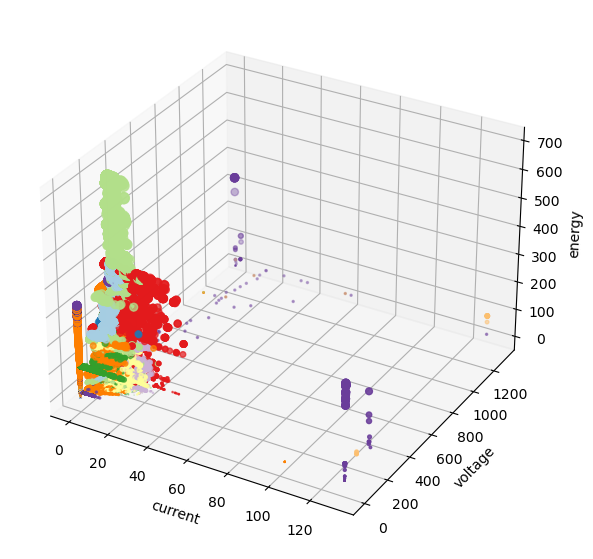

In [17]:
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111,projection='3d')
ax.scatter(df['current'],df['voltage'],df['energy'],c=df['color_code'], s = df['energy']/10)
ax.set_xlabel('current')
ax.set_ylabel('voltage')
ax.set_zlabel('energy')
plt.show()

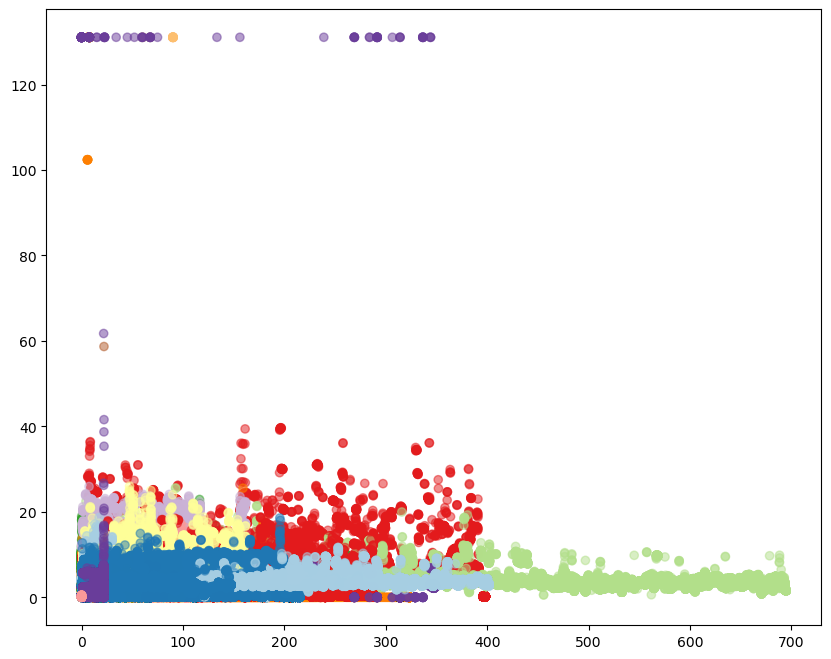

In [19]:
plt.figure(figsize=[10,8])
plt.scatter(df['energy'],df['current'],c=df['color_code'],alpha=0.5)
plt.show()

In [20]:
df = df.reset_index(drop=True)

In [21]:
df

,meter_id,timestamp,current,voltage,frequency,power_factor,energy,real_power,reactive_power,apparent_power,color_code
0,AED201,2022-10-17 08:49:15+01:00,0.33,221.96,50.06,0.00,0.0201,0.00,73.25,73.25,"(0.8901960784313725, 0.10196078431372549, 0.10..."
1,AED201,2022-10-17 08:50:09+01:00,0.42,221.04,50.11,0.66,0.0206,61.56,70.08,93.28,"(0.8901960784313725, 0.10196078431372549, 0.10..."
2,AED201,2022-10-17 08:51:03+01:00,0.39,221.00,50.10,0.72,0.0214,61.74,59.51,85.75,"(0.8901960784313725, 0.10196078431372549, 0.10..."
3,AED201,2022-10-17 08:51:57+01:00,0.37,220.88,50.14,0.75,0.0222,61.63,54.35,82.17,"(0.8901960784313725, 0.10196078431372549, 0.10..."
4,AED201,2022-10-29 14:52:26+01:00,0.23,213.38,50.24,0.92,0.0237,45.94,19.56,49.93,"(0.8901960784313725, 0.10196078431372549, 0.10..."
...,...,...,...,...,...,...,...,...,...,...,...
1048136,PED203,2023-03-09 11:30:37+01:00,0.00,0.00,0.00,0.00,0.0000,0.00,0.00,0.00,"(0.984313725490196, 0.6039215686274509, 0.6, 1.0)"
1048137,PED203,2023-03-09 11:31:31+01:00,0.00,0.00,0.00,0.00,0.0000,0.00,0.00,0.00,"(0.984313725490196, 0.6039215686274509, 0.6, 1.0)"
1048138,PED203,2023-03-09 11:32:25+01:00,0.00,0.00,0.00,0.00,0.0000,0.00,0.00,0.00,"(0.984313725490196, 0.6039215686274509, 0.6, 1.0)"
1048139,PED203,2023-03-09 11:33:19+01:00,0.00,0.00,0.00,0.00,0.0000,0.00,0.00,0.00,"(0.984313725490196, 0.6039215686274509, 0.6, 1.0)"


In [22]:
df.describe()

,current,voltage,frequency,power_factor,energy,real_power,reactive_power,apparent_power
count,1.048141e+06,1.048141e+06,1.048141e+06,1.048141e+06,1.048141e+06,1.048141e+06,1.048141e+06,1.048141e+06
mean,1.836673e+00,1.933338e+02,5.139746e+01,6.466557e-01,8.736502e+01,2.793867e+02,1.894424e+02,3.554829e+02
std,3.194079e+00,5.049676e+01,1.920531e+01,5.152064e-01,1.136865e+02,5.485236e+02,5.818987e+02,7.918721e+02
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,4.000000e-02,1.882000e+02,5.008000e+01,5.200000e-01,9.079500e+00,3.840000e+00,5.600000e+00,7.530000e+00
50%,9.100000e-01,2.051800e+02,5.018000e+01,6.900000e-01,5.264100e+01,1.342200e+02,5.996000e+01,1.629000e+02
75%,2.860000e+00,2.195800e+02,5.028000e+01,8.600000e-01,1.186364e+02,4.107900e+02,3.214800e+02,5.724700e+02
max,1.310700e+02,1.310700e+03,6.400800e+02,3.277000e+01,6.947378e+02,9.964020e+04,1.717935e+05,1.717935e+05


In [23]:
df1 = df.drop(df.query('energy == 0 & current == 0').index,axis='index')

df1 : drop index with energy & current = 0

In [24]:
# drop rows with current or voltage == 0
df2 = df1.drop(df1.query('current == 0 or voltage ==0').index, axis='index')

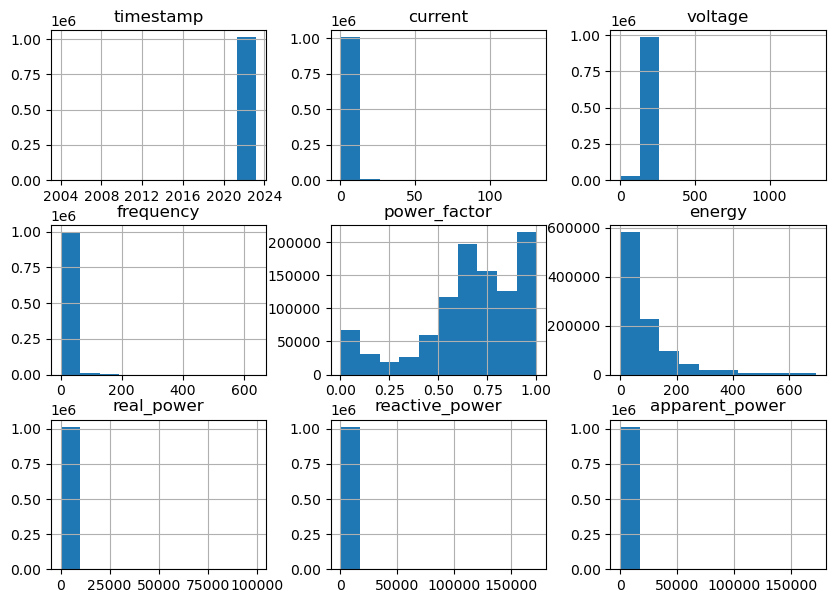

In [25]:
df2.hist(figsize=[10,7]);

In [26]:
df2.query('current == 0 or voltage == 0 or frequency == 0 or power_factor == 0 or real_power == 0 or reactive_power == 0 or apparent_power == 0')

,meter_id,timestamp,current,voltage,frequency,power_factor,energy,real_power,reactive_power,apparent_power,color_code
0,AED201,2022-10-17 08:49:15+01:00,0.33,221.96,50.06,0.0,0.0201,0.00,73.25,73.25,"(0.8901960784313725, 0.10196078431372549, 0.10..."
8356,AED201,2022-11-20 07:22:30+01:00,0.11,166.34,50.13,1.0,2.7526,17.63,0.00,17.63,"(0.8901960784313725, 0.10196078431372549, 0.10..."
8357,AED201,2022-11-20 07:23:24+01:00,0.10,163.50,50.11,1.0,2.7530,16.68,0.00,16.68,"(0.8901960784313725, 0.10196078431372549, 0.10..."
8358,AED201,2022-11-20 07:24:18+01:00,0.10,165.88,50.10,1.0,2.7532,17.25,0.00,17.25,"(0.8901960784313725, 0.10196078431372549, 0.10..."
8359,AED201,2022-11-20 07:25:12+01:00,0.15,162.46,50.09,1.0,2.7536,23.72,0.00,23.72,"(0.8901960784313725, 0.10196078431372549, 0.10..."
...,...,...,...,...,...,...,...,...,...,...,...
1046178,PED202,2023-03-11 01:00:44+01:00,2.11,0.06,107.99,0.0,22.1855,0.00,0.13,0.13,"(0.41568627450980394, 0.23921568627450981, 0.6..."
1046179,PED202,2023-03-11 01:01:40+01:00,2.12,0.06,124.88,0.0,22.1855,0.00,0.13,0.13,"(0.41568627450980394, 0.23921568627450981, 0.6..."
1046180,PED202,2023-03-11 01:02:35+01:00,2.11,0.06,141.02,0.0,22.1856,0.00,0.13,0.13,"(0.41568627450980394, 0.23921568627450981, 0.6..."
1046181,PED202,2023-03-11 01:03:31+01:00,2.12,0.06,95.66,0.0,22.1856,0.00,0.13,0.13,"(0.41568627450980394, 0.23921568627450981, 0.6..."


In [27]:
# columns to perform PCA on
cols = ['current','voltage','frequency','power_factor','real_power','reactive_power','apparent_power']

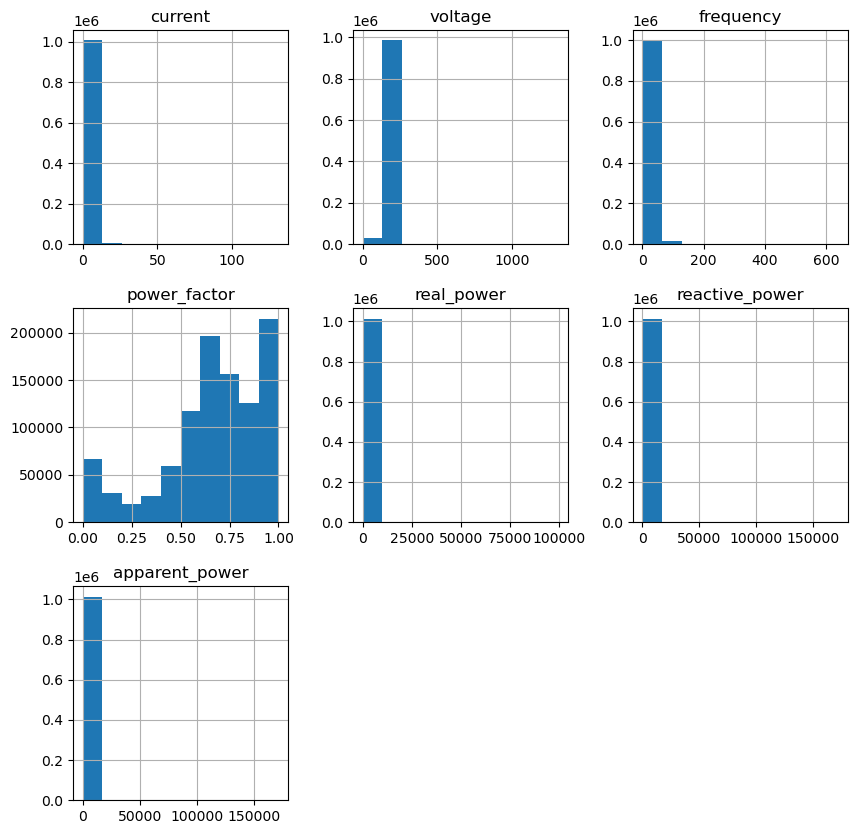

In [28]:
df2[cols].hist(figsize=[10,10]);

In [29]:
df2.columns

Index(['meter_id', 'timestamp', 'current', 'voltage', 'frequency',
       'power_factor', 'energy', 'real_power', 'reactive_power',
       'apparent_power', 'color_code'],
      dtype='object')

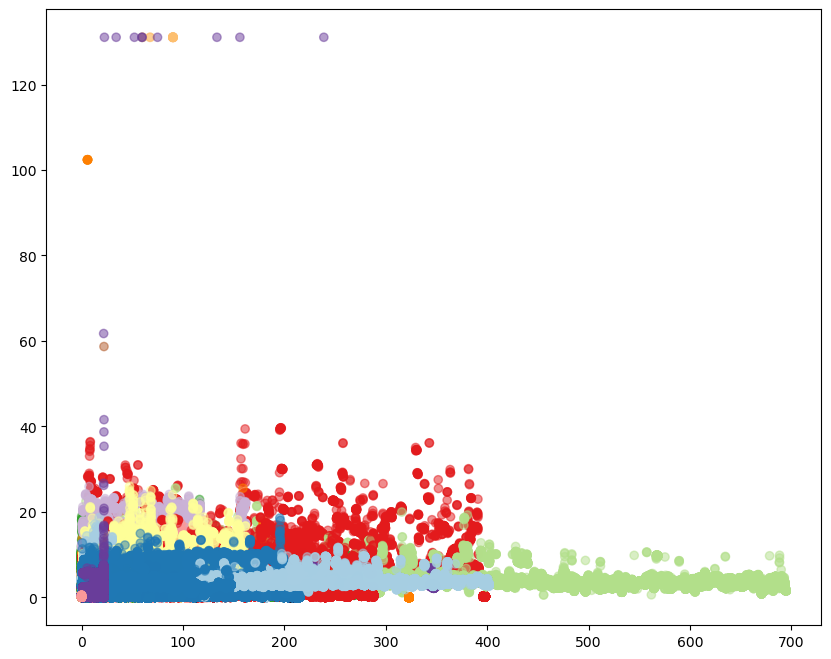

In [30]:
plt.figure(figsize=[10,8])
plt.scatter(df2['energy'],df2['current'],c=df2['color_code'],alpha=0.5)
plt.show()

In [31]:
df2.meter_id.value_counts()

IKD201    124791
IKD202     88630
BED222     70742
BED203     60690
BED202     59458
IBD210     58238
BED201     54775
IBD205     49738
IKD204     48713
BED205     43745
PED202     42536
AED201     38662
IBD209     36904
IBD212     35277
IBD207     32308
IBD213     23910
IBD240     23088
IBD217     22923
BED204     20365
IKD203     14183
IBD301     13833
IBD208     11411
IBD214     11312
IBD216      8685
BED221      6868
BED208      4793
PED203      1954
IBD204      1497
BED207      1292
IBD219       987
PED201       480
IBD218       460
BED206       428
AED202       185
BED209       122
BED220        67
BED213        17
IBD220        13
BED225         9
BED217         8
BED216         8
BED215         6
BED218         3
AED203         2
BED226         1
Name: meter_id, dtype: int64

In [32]:
# drop meter with only one observation
df3 = df2.drop(df2[df2['meter_id'] == 'BED226'].index, axis='index')

In [33]:
df3.to_csv('cleaned_energy_data.csv',index=False)

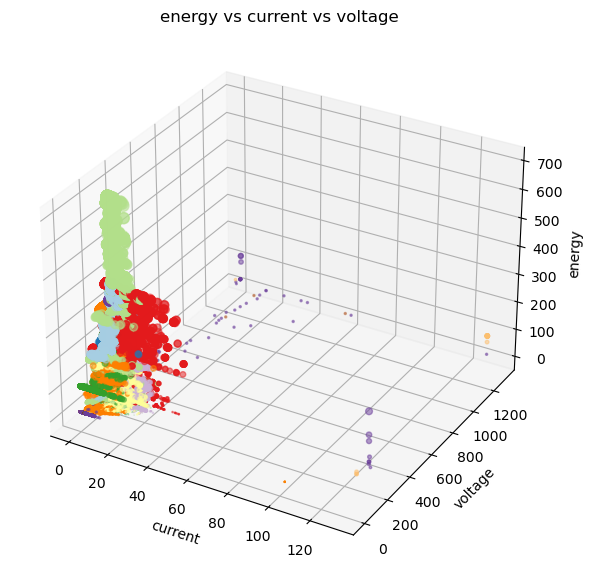

In [55]:
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111,projection='3d')
ax.scatter(df3['current'],df3['voltage'],df3['energy'],c=df3['color_code'], s = df3['energy']/10, alpha = 0.5)
ax.set_xlabel('current')
ax.set_ylabel('voltage')
ax.set_zlabel('energy')
plt.title('energy vs current vs voltage')
plt.show()

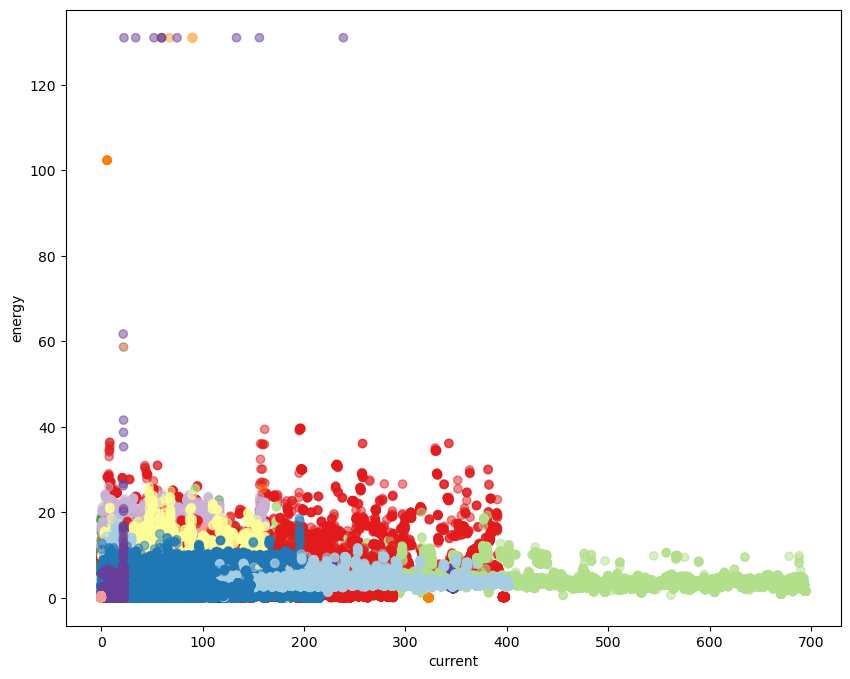

In [58]:
plt.figure(figsize=[10,8])
plt.scatter(df3['energy'],df3['current'],c=df3['color_code'],alpha=0.5)
plt.ylabel('energy')
plt.xlabel('current')
plt.show()

In [34]:
x = df3.drop(columns = ['energy','color_code'])
y = df3['energy']

In [35]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,stratify=x['meter_id'],random_state=42)

In [36]:
list(x_train.columns)

['meter_id',
 'timestamp',
 'current',
 'voltage',
 'frequency',
 'power_factor',
 'real_power',
 'reactive_power',
 'apparent_power']

In [37]:
cat_col = ['meter_id']
others = list(x_train.columns)[2:]

In [38]:
others

['current',
 'voltage',
 'frequency',
 'power_factor',
 'real_power',
 'reactive_power',
 'apparent_power']

In [39]:
from sklearn.compose import ColumnTransformer

from sklearn.preprocessing import OneHotEncoder

from sklearn.decomposition import PCA

from sklearn.pipeline import Pipeline

from sklearn.preprocessing import StandardScaler

from sklearn.metrics import mean_squared_error

In [40]:
def fit_predict(pipe):
    
    from sklearn.linear_model import LinearRegression
    lin_reg = LinearRegression()
    lin_reg.fit(pipe.fit_transform(x_train),y_train)
    preds = lin_reg.predict(pipe.transform(x_test))
    print(np.sqrt(mean_squared_error(y_test,preds)))


**Linear Regression without PCA**

In [41]:
col_pipe1 = ColumnTransformer([
    ('encode',OneHotEncoder(),cat_col),
    ('scale', StandardScaler(),others)], remainder='drop')

In [42]:
fit_predict(col_pipe1)

80.87096006713485


### Linear Regression with PCA

In [43]:

col_pipe2 = ColumnTransformer([
    ('encode',OneHotEncoder(),cat_col),
    ('scale', StandardScaler(),others),
    ('pca', PCA(n_components=0.95),others)], remainder='drop')

In [44]:
fit_predict(col_pipe2)

80.93337022019199


### Kernel PCA

In [45]:
from sklearn.decomposition import KernelPCA

from sklearn.decomposition import IncrementalPCA

In [46]:
ipca = IncrementalPCA(n_components=2,batch_size=100)
kpca = KernelPCA(n_components=2, kernel = 'rbf')

In [47]:
# first perform preprocessing on x_train
x_train_trans = pd.DataFrame(col_pipe1.fit_transform(x_train).toarray()) # conversion to array is necessary cos of sparse matrix

In [48]:
# select columns to perform kpca on 
x_train_pca_cols = x_train_trans.iloc[:,-7:]

In [49]:
# Perform Kernel PCA incrementally (to prevent memory error)

ipca = IncrementalPCA(n_components=2,batch_size=100)
kpca = KernelPCA(n_components=2, kernel = 'linear')
batch_size = 100


for i in range(0, x_train_pca_cols.shape[0],batch_size):
    x_batch = x_train_pca_cols[i:i+batch_size]
    ipca.partial_fit(x_batch)
    kpca.fit_transform(x_batch)

x_ipca = ipca.transform(x_train_pca_cols)
x_kpca = kpca.transform(x_train_pca_cols)

In [50]:
# concatenate the columns together
x_train_prepared = pd.concat([x_train_trans.iloc[:,:-7],pd.DataFrame(x_kpca)],axis=1)

In [51]:
# repeat same proceedure to x_test
x_test_trans = pd.DataFrame(col_pipe1.transform(x_test).toarray())

x_test_pca_cols = x_test_trans.iloc[:,-7:]

x_test_kpca = kpca.transform(x_test_pca_cols)

x_test_prepared = pd.concat([x_test_trans.iloc[:,:-7],pd.DataFrame(x_test_kpca)],axis=1)

In [52]:
# Modelling and Testing

from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(x_train_prepared,y_train)
preds = lin_reg.predict(x_test_prepared)
mean_squared_error(y_test,preds)

6576.553330006635

**Normal PCA performed better than Kernel PCA**

### Locally Linear Embedding (LLE)

In [53]:
from sklearn.manifold import LocallyLinearEmbedding

In [54]:
lle = LocallyLinearEmbedding(n_components=2, n_neighbors=10)